In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange

In [2]:
from functions.ellipsoid import Ellipsoid
from functions.rosenbrock import Rosenbrock
from functions.log_ellipsoid import LogEllipsoid
from functions.attractive_sector import AttractiveSector
from functions.sum_of_different_powers import SumOfDifferentPowers

In [3]:
from optimizers.line_search.newton import NewtonLineSearch
from optimizers.line_search.steepest_descent import SteepestDescentLineSearch

In [4]:
def plot_minimizer_ellipsoid(minimize):
    xk_at_i = []
    def c(xk):
        xk_at_i.append(xk)
        if np.linalg.norm(Ellipsoid.gradient(xk)) < 0.1:
            return True
        return False
    minimize(Ellipsoid.f, [10, 10], Ellipsoid.gradient, hes=Ellipsoid.hessian, callback=c)
    #print([np.linalg.norm(xk) for xk in xk_at_i])
    plt.yscale('log')
    plt.plot([np.linalg.norm(Ellipsoid.gradient(xk)) for xk in xk_at_i])

newton start new
eigenvals
newton start new
eigenvals
newton start new
eigenvals
newton start new
eigenvals
newton start new
eigenvals
newton start new
eigenvals
newton start new
eigenvals
newton start new
eigenvals
newton start new
eigenvals
newton start new
eigenvals
newton start new
eigenvals
newton start new
eigenvals
newton start new
eigenvals
newton start new
eigenvals
newton start new
eigenvals
newton start new
eigenvals


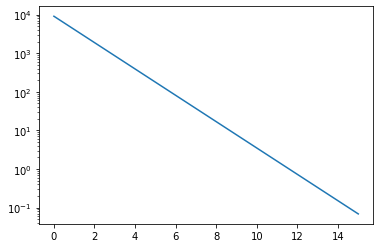

In [5]:
plot_minimizer_ellipsoid(NewtonLineSearch.minimize)

In [ ]:
plot_minimizer_ellipsoid(SteepestDescentLineSearch.minimize)

In [ ]:
def plot_minimizer_rosenbrock(minimize):
    xk_at_i = []
    def c(xk):
        xk_at_i.append(xk)
        if np.linalg.norm(Rosenbrock.gradient(xk)) < 0.1:
            return True
        return False
    minimize(Rosenbrock.f, [10, 10], Rosenbrock.gradient, hes=Rosenbrock.hessian, callback=c)
    #print([np.linalg.norm(xk) for xk in xk_at_i])
    plt.yscale('log')
    plt.plot([np.linalg.norm(Rosenbrock.gradient(xk)) for xk in xk_at_i])

In [ ]:
plot_minimizer_rosenbrock(NewtonLineSearch.minimize)

In [ ]:
plot_minimizer_rosenbrock(SteepestDescentLineSearch.minimize)

In [ ]:
def plot_minimizer_log_ellipsoid(minimize):
    xk_at_i = []
    print("1")
    def c(xk):
        xk_at_i.append(xk)
        if np.linalg.norm(LogEllipsoid.gradient(xk)) < 0.1:
            return True
        return False
    print("2")
    minimize(LogEllipsoid.f, [10, 10], LogEllipsoid.gradient, hes=LogEllipsoid.hessian, callback=c)
    #print([np.linalg.norm(xk) for xk in xk_at_i])
    plt.yscale('log')
    plt.plot([np.linalg.norm(LogEllipsoid.gradient(xk)) for xk in xk_at_i])

In [ ]:
plot_minimizer_log_ellipsoid(NewtonLineSearch.minimize)

In [ ]:
print("hello")

In [ ]:
plot_minimizer_log_ellipsoid(SteepestDescentLineSearch.minimize)